# Bank Marketing Data Set  

Data source: 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
To download the data use this link: 
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [2]:
import numpy as np 
from datetime import date as dt
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Importing and preparing the data

In [3]:
df=pd.read_csv("C:\Users\HP\bank-additional-full.csv" , delimiter=';') 
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We succesfully uploaded our data base, now we need to analyze the data structure, check the data classes of the variables, to find out if the data base has any outliers and missing values.


In [4]:
print('Dimensionality of the data is {}'.format(df.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df.size))
df.info()



Dimensionality of the data is (41188, 21)
The data set has 41188 cases.
The total number of elements is 864948.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41150 non-null  float64
 11  campaign        41170 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.r

In [5]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41170.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.566505,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.757964,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


This data set consists of 21 variables: 20 of them are independent. The variable "y" is a dependent variable. Big amoint of variables consist of character values (categorical variables). The approach to interpreting this variables will be observed later. The data set has quite a big size (6+ MB). Before moving forward, it is necessary to seize the size of the data set.

### Missing values

In [7]:
df_null =df.isnull().sum(); pr=df.isnull().sum()/df.shape[0]
Nan=pd.concat([df_null,round(pr, 2)], axis=1, keys=["Total of missing values" ,"pourcentage (%)"]) ; Nan  

,Total of missing values,pourcentage (%)
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


There's no missing values in the dataset

## Exploratory Data Analysis

For now it is enough to continue with data exploration. Let's visualise data using graphic approach.

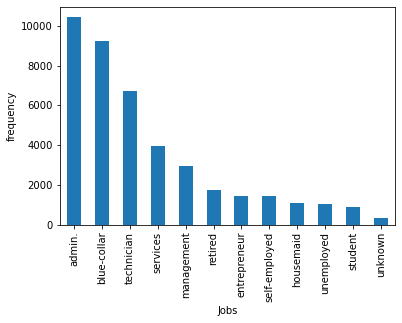

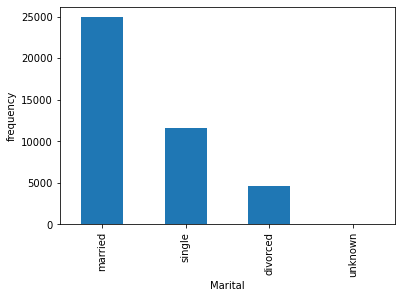

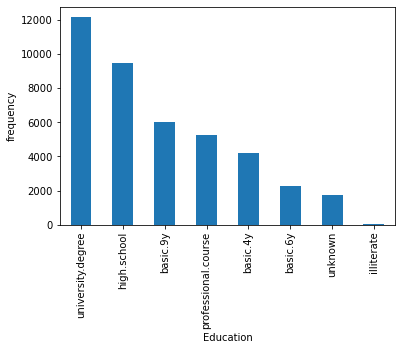

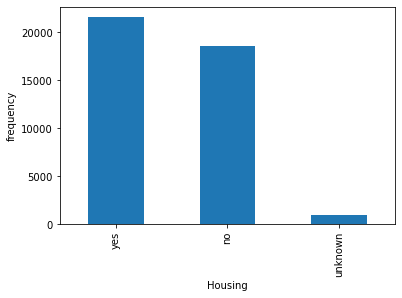

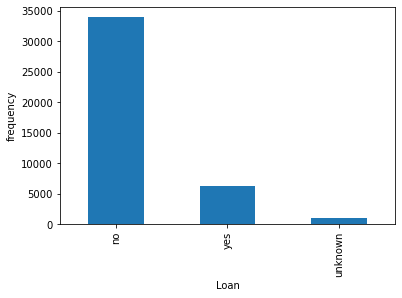

In [8]:
df['job'].value_counts().plot(kind='bar')
plt.xlabel("Jobs")
plt.ylabel("frequency")
plt.show()

df['marital'].value_counts().plot(kind='bar')
plt.xlabel("Marital")
plt.ylabel("frequency")
plt.show() 

df['education'].value_counts().plot(kind='bar')
plt.xlabel("Education")
plt.ylabel("frequency")
plt.show() 


df['housing'].value_counts().plot(kind='bar')
plt.xlabel("Housing")
plt.ylabel("frequency")
plt.show() 

df['loan'].value_counts().plot(kind='bar')
plt.xlabel("Loan")
plt.ylabel("frequency")
plt.show()


we can see the same information using pies as follows;

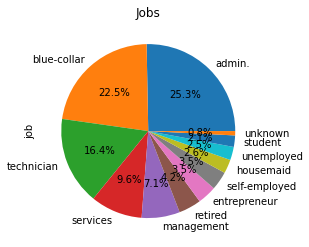

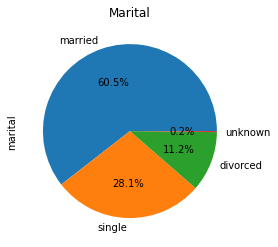

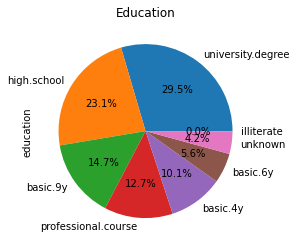

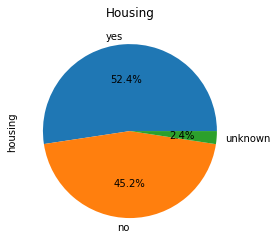

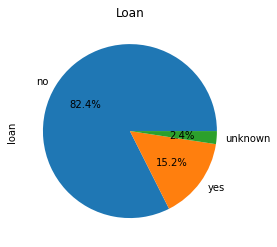

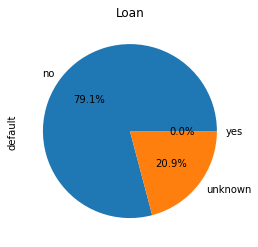

In [19]:
df['job'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Jobs")
plt.show()

df['marital'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Marital")
plt.show()

df['education'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Education")
plt.show()


df['housing'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Housing")
plt.show()

df['loan'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Loan")
plt.show() 

df['default'].value_counts(sort=True).plot.pie( autopct='%1.1f%%' , title="Loan")
plt.show()

The created graphs show us distribution of categorical variables. What can be noticed:
1. 60% of people contacted are married and have different Job but the most commun ones are; admin, blue-collar , technician and services 
2. Variable "Loan" has two levels. Obviously, most of people contacted 80% has not a personal loan.
3. Most of them has no credit default (79%)  


No let's see compare these variables amongs categories (marital, jobs & education)

###  "marital" categories

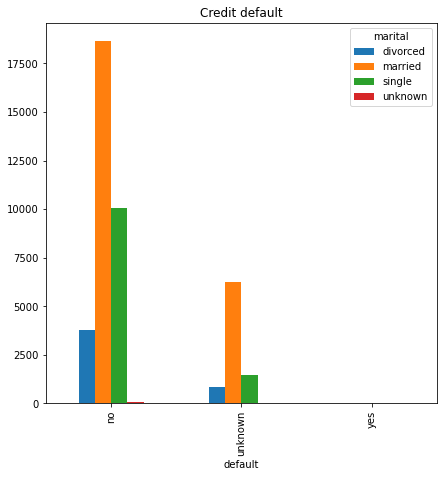

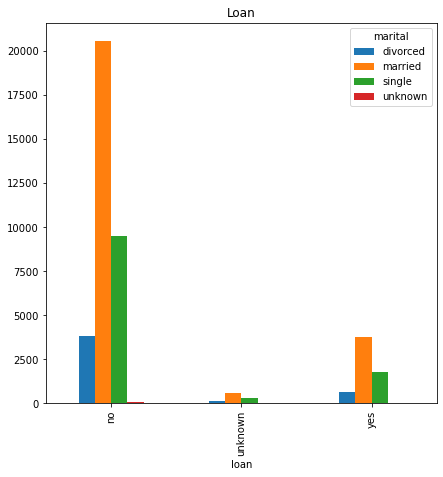

In [10]:
gender_column = "marital"
df.groupby(["default", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Credit default') 
plt.show() 


gender_column = "marital"
df.groupby(["loan", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Loan') 
plt.show()


### "job" categories

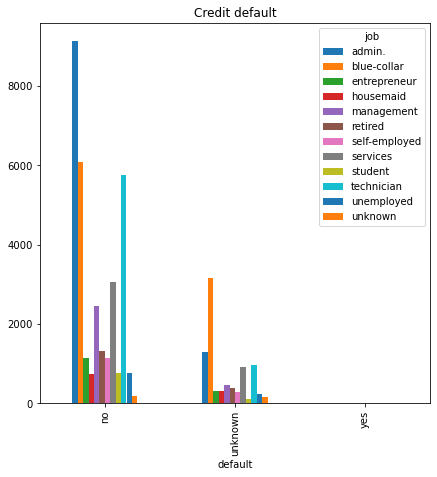

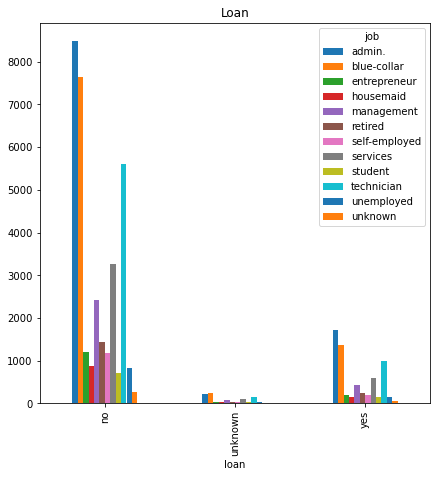

In [11]:
gender_column = "job"
df.groupby(["default", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Credit default')
plt.show() 


gender_column = "job"
df.groupby(["loan", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Loan') 
plt.show()


### "Education" categories

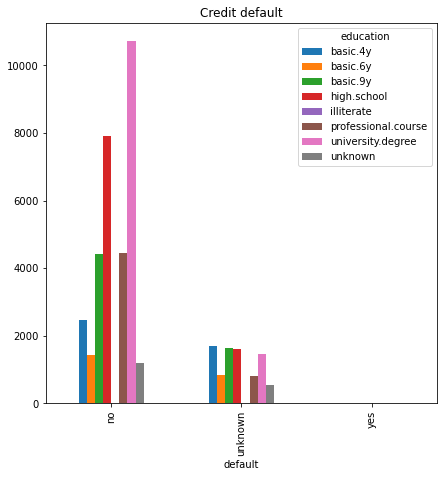

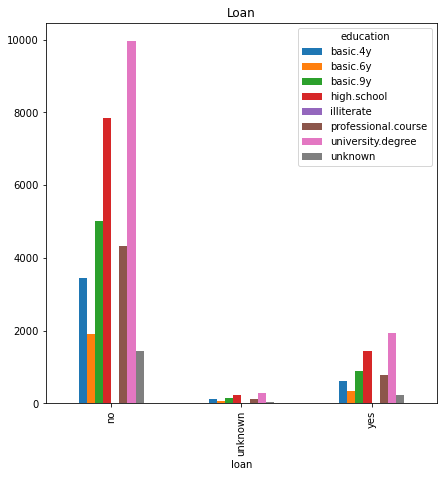

In [12]:
gender_column = "education"
df.groupby(["default", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Credit default') 
plt.show() 


gender_column = "education"
df.groupby(["loan", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(7,7)) 
plt.title('Loan') 
plt.show()

Let's dig deeper and visualize other variables that are supposedly correlated with the target variables "y"

### The 'duration' variable : 

last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

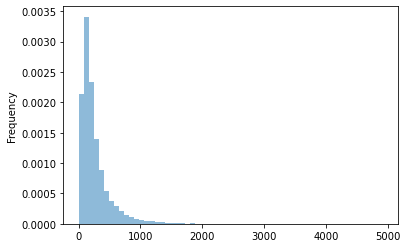

In [26]:
df['duration'].plot.hist(bins=60, alpha=0.5, density=True)

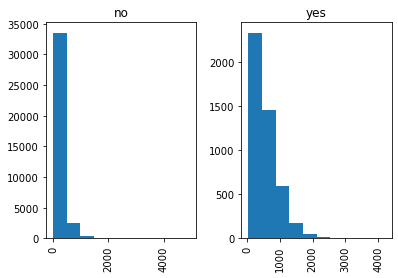

In [33]:

df.hist(by='y',column = 'duration')
plt.show()

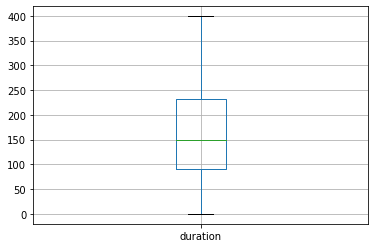

In [26]:
fig, ax = plt.subplots()
cols=['age',"emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m"] 
#d = pd.DataFrame(df['duration'], columns=list('ABCDE'))
df[df['duration']<400].boxplot(column='duration' )
#ax.set_xticks(range(10))
#ax.set_xticklabels(range(10))
plt.show()

Text(0, 0.5, 'Duration')

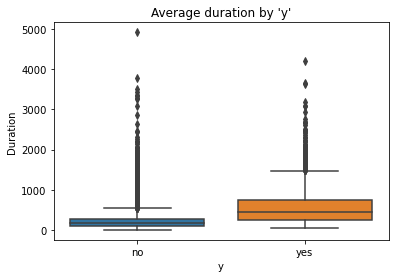

In [15]:
ax=sns.boxplot(x='y',y='duration',data=df)
ax.set_title("Average duration by 'y'")
ax.set_ylabel('Duration')

In general people who has subscribed a term deposit have more duration 